### Statement

Esse notebook é utilizado como forma de estudo referente a implementação: Multi-Level Threholding based on PSO algorithm

## Tentative 1: Verificação da PSO de forma generalista

* problem statement as example:  Minimizing sphere function

Parameters of problem:
* Number of dimensions (d) = 3
* Lower bound (minx) = -10.0
* Upper bound (maxx) = 10.0

Hyperparameters of the algorithm:  
* Number of particles (N) = 50
* Maximum number of iterations (max_iter) = 100
* inertia coefficient (w) = 0.729
* cognitive coefficient (c1) = 1.49445
* social coefficient (c2) = 1.49445

Inputs
* Fitness function
* Problem parameters (mentioned above)
* Population size (N) and Maximum number of iterations  (max_iter)
* Algorithm Specific hyper parameters ( w, c1, c2)

In [25]:
import random
import math
import copy
import sys
import pylab as py
py.rcParams.update({'font.size': 14})


# fitness function

#sphere function:

def fitness_sphere(position):
    fitnessVal = 0.0
    for i in range(len(position)):
        xi = position[i]
        fitnessVal += (xi*xi);
    return fitnessVal;

#particle class
class Particle:
  def __init__(self, fitness, dim, minx, maxx, seed):
    self.rnd = random.Random(seed)
 
    # initialize position of the particle with 0.0 value
    self.position = [0.0 for i in range(dim)]
 
     # initialize velocity of the particle with 0.0 value
    self.velocity = [0.0 for i in range(dim)]
 
    # initialize best particle position of the particle with 0.0 value
    self.best_part_pos = [0.0 for i in range(dim)]
 
    # loop dim times to calculate random position and velocity
    # range of position and velocity is [minx, max]
    for i in range(dim):
      self.position[i] = ((maxx - minx) *
        self.rnd.random() + minx)
      self.velocity[i] = ((maxx - minx) *
        self.rnd.random() + minx)
 
    # compute fitness of particle
    self.fitness = fitness(self.position) # curr fitness
 
    # initialize best position and fitness of this particle
    self.best_part_pos = copy.copy(self.position)
    self.best_part_fitnessVal = self.fitness # best fitness
 
# particle swarm optimization function
def pso(fitness, max_iter, n, dim, minx, maxx):
  # hyper parameters
  w = 0.729    # inertia
  c1 = 1.49445 # cognitive (particle)
  c2 = 1.49445 # social (swarm)
 
  rnd = random.Random(0)
 
  # create n random particles
  swarm = [Particle(fitness, dim, minx, maxx, i) for i in range(n)]
 
  # compute the value of best_position and best_fitness in swarm
  best_swarm_pos = [0.0 for i in range(dim)]
  best_swarm_fitnessVal = sys.float_info.max # swarm best
 
  # computer best particle of swarm and it's fitness
  for i in range(n): # check each particle
    if swarm[i].fitness < best_swarm_fitnessVal:
      best_swarm_fitnessVal = swarm[i].fitness
      best_swarm_pos = copy.copy(swarm[i].position)
 
  # main loop of pso
  Iter = 0
  while Iter < max_iter:
     
    # after every 10 iterations
    # print iteration number and best fitness value so far
    if Iter % 10 == 0 and Iter > 1:
      print("Iter = " + str(Iter) + " best fitness = %.3f" % best_swarm_fitnessVal)
 
    for i in range(n): # process each particle
       
      # compute new velocity of curr particle
      for k in range(dim):
        r1 = rnd.random()    # randomizations
        r2 = rnd.random()
     
        swarm[i].velocity[k] = (
                                 (w * swarm[i].velocity[k]) +
                                 (c1 * r1 * (swarm[i].best_part_pos[k] - swarm[i].position[k])) + 
                                 (c2 * r2 * (best_swarm_pos[k] -swarm[i].position[k]))
                               ) 
 
 
        # if velocity[k] is not in [minx, max]
        # then clip it
        if swarm[i].velocity[k] < minx:
          swarm[i].velocity[k] = minx
        elif swarm[i].velocity[k] > maxx:
          swarm[i].velocity[k] = maxx
 
 
      # compute new position using new velocity
      for k in range(dim):
        swarm[i].position[k] += swarm[i].velocity[k]
   
      # compute fitness of new position
      swarm[i].fitness = fitness(swarm[i].position)
 
      # is new position a new best for the particle?
      if swarm[i].fitness < swarm[i].best_part_fitnessVal:
        swarm[i].best_part_fitnessVal = swarm[i].fitness
        swarm[i].best_part_pos = copy.copy(swarm[i].position)
 
      # is new position a new best overall?
      if swarm[i].fitness < best_swarm_fitnessVal:
        best_swarm_fitnessVal = swarm[i].fitness
        best_swarm_pos = copy.copy(swarm[i].position)
     
    # for-each particle
    Iter += 1
  #end_while
  return best_swarm_pos
# end pso
 

 
# Driver code for Sphere function
print("\nBegin particle swarm optimization on sphere function\n")
dim = 3
fitness = fitness_sphere
 
 

 
num_particles = 50
max_iter = 100
 
print("Setting num_particles = " + str(num_particles))
print("Setting max_iter    = " + str(max_iter))
print("\nStarting PSO algorithm\n")
 
 
 
best_position = pso(fitness, max_iter, num_particles, dim, -10.0, 10.0)
 
print("\nPSO completed\n")
print("\nBest solution found:")
print(["%.6f"%best_position[k] for k in range(dim)])
fitnessVal = fitness(best_position)
print("fitness of best solution = %.6f" % fitnessVal)
 
print("\nEnd particle swarm for sphere function\n")




Begin particle swarm optimization on sphere function

Setting num_particles = 50
Setting max_iter    = 100

Starting PSO algorithm

Iter = 10 best fitness = 0.189
Iter = 20 best fitness = 0.012
Iter = 30 best fitness = 0.001
Iter = 40 best fitness = 0.000
Iter = 50 best fitness = 0.000
Iter = 60 best fitness = 0.000
Iter = 70 best fitness = 0.000
Iter = 80 best fitness = 0.000
Iter = 90 best fitness = 0.000

PSO completed


Best solution found:
['0.000004', '-0.000001', '0.000007']
fitness of best solution = 0.000000

End particle swarm for sphere function



## Tentative 2: Verificação da PSO utilizando Entropia de Shannon como Função Fitness

* Baseado na generalização, trocando a função sphere pela Entropia de Shannon

num_particles = 50
max_iteracoes    = 5

Starting PSO algorithm

Iter = 2 best fitness = 91.000
Iter = 3 best fitness = 91.000
Iter = 4 best fitness = 91.000

PSO completed


Best solution found:
['6.888437']
fitness of best solution = 91.000000

End particle swarm function

The threshold value is:  91


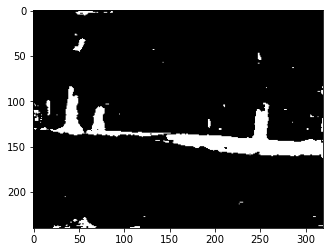

In [26]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import random # usado para gerar números pseudo aleatórios
import math   # para calculo matematicos
import copy   #
import sys    #
import cv2
import numpy as np
from matplotlib import pyplot as plt



img = cv2.imread('000280.jpg') # importing image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converting to grayscale
#plt.imshow(img, cmap='gray')

# starts pso

# -------fitness functions ---------

#shannon's entropy into fitness function


def fitness_entropy(position):
   # fitnessVal = 0.0
    # Helper function for calculating entropy
    def entp(x):
        temp = np.multiply(x, np.log(x))
        temp[np.isnan(temp)] = 0
        return temp
    
    H = cv2.calcHist([img],[0],None,[256],[0,256])
    H = H / np.sum(H)
    
    theta = np.zeros(256)
    Hf = np.zeros(256)
    Hb = np.zeros(256)

    for T in range(0,255):
        Hf[T] = - np.sum( entp(H[:T] / np.sum(H[:T])) )
        Hb[T] = - np.sum( entp(H[T+1:] / np.sum(H[T+1:])) )
        theta[T] = Hf[T] + Hb[T]
        
        
    theta_max = np.argmax(theta)
    img_out = img > theta_max
    
    fitnessVal = theta_max
    
    return fitnessVal

#particle class
class Particle:
  def __init__(self, fitness, dim, minx, maxx, seed):
    self.rnd = random.Random(seed)
 
    # iniciando  posicao da particula com valor 0.0
    self.position = [0.0 for i in range(dim)]
 
    #iniciando a velocidade da parte com valor 0.0
    self.velocity = [0.0 for i in range(dim)]
 
    #iniciando a melhor posicao da particula com valor 0.0
    self.best_part_pos = [0.0 for i in range(dim)]
 
    # loop dim times para calcular a posição e a velocidade aleatórias
    # range of position and velocity is [minx, maxx]
    for i in range(dim):
      self.position[i] = ((maxx - minx) * self.rnd.random() + minx)
      self.velocity[i] = ((maxx - minx) * self.rnd.random() + minx)
 
    # compute fitness of particle
    self.fitness = fitness(self.position) # curr fitness
 
    # initialize best position and fitness of this particle
    self.best_part_pos = copy.copy(self.position)
    self.best_part_fitnessVal = self.fitness # best fitness
    
    
    # pso function

def pso(fitness, max_iter, n, dim, minx, maxx):
  # hyper parameters
  w = 0.8    # inertia
  c1 = 2 # cognitive (particle)
  c2 = 2 # social (swarm)
 
  rnd = random.Random(0)
 
  # create n random particles
  swarm = [Particle(fitness, dim, minx, maxx, i) for i in range(n)]
 
  # compute the value of best_position and best_fitness in swarm
  best_swarm_pos = [0.0 for i in range(dim)]
  best_swarm_fitnessVal = sys.float_info.max # swarm best
 
  # computer best particle of swarm and it's fitness
  for i in range(n): # check each particle
    if swarm[i].fitness < best_swarm_fitnessVal:
      best_swarm_fitnessVal = swarm[i].fitness
      best_swarm_pos = copy.copy(swarm[i].position)
 
  # main loop of pso
  Iter = 0
  while Iter < max_iter:
     
    # after every 10 iterations
    # print iteration number and best fitness value so far
    if Iter % 1 == 0 and Iter > 1:
      print("Iter = " + str(Iter) + " best fitness = %.3f" % best_swarm_fitnessVal)
 
    for i in range(n): # process each particle
       
      # compute new velocity of curr particle
      for k in range(dim):
        r1 = rnd.random()    # randomizations
        r2 = rnd.random()
     
        swarm[i].velocity[k] = (
                                 (w * swarm[i].velocity[k]) +
                                 (c1 * r1 * (swarm[i].best_part_pos[k] - swarm[i].position[k])) + 
                                 (c2 * r2 * (best_swarm_pos[k] -swarm[i].position[k]))
                               ) 
 
 
        # if velocity[k] is not in [minx, max]
        # then clip it
        if swarm[i].velocity[k] < minx:
          swarm[i].velocity[k] = minx
        elif swarm[i].velocity[k] > maxx:
          swarm[i].velocity[k] = maxx
 
 
      # compute new position using new velocity
      for k in range(dim):
        swarm[i].position[k] += swarm[i].velocity[k]
   
      # compute fitness of new position
      swarm[i].fitness = fitness(swarm[i].position)
 
      # is new position a new best for the particle?
      if swarm[i].fitness < swarm[i].best_part_fitnessVal:
        swarm[i].best_part_fitnessVal = swarm[i].fitness
        swarm[i].best_part_pos = copy.copy(swarm[i].position)
 
      # is new position a new best overall?
      if swarm[i].fitness < best_swarm_fitnessVal:
        best_swarm_fitnessVal = swarm[i].fitness
        best_swarm_pos = copy.copy(swarm[i].position)
     
    # for-each particle
    Iter += 1
  #end_while
  return best_swarm_pos
# end pso
 
dim = 1
fitness = fitness_entropy

num_particles = 50
max_iter = 5

print("num_particles = " + str(num_particles))
print("max_iteracoes    = " + str(max_iter))
print("\nStarting PSO algorithm\n")
 
best_position = pso(fitness, max_iter, num_particles, dim, -10.0, 10.0)
 
print("\nPSO completed\n")
print("\nBest solution found:")
print(["%.6f"%best_position[k] for k in range(dim)])
fitnessVal = fitness(best_position)
print("fitness of best solution = %.6f" % fitnessVal)
 
print("\nEnd particle swarm function\n")   

def imshow(img):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.show()
    
img_out = img > fitnessVal

print("The threshold value is: ", fitnessVal)
imshow(img_out * 255)

* Conteúdo de Estudo abaixo:

Iter. = 0 . gbest_val =  -3.720451982596564
gbest_val =  -3.720451982596564
Iter. = 1 . gbest_val =  0.04066403235878724
Iter. = 2 . gbest_val =  0.04066403235878724
Iter. = 3 . gbest_val =  0.5762184356253888
Iter. = 4 . gbest_val =  1.3920945220308525
Iter. = 5 . gbest_val =  1.3920945220308525
Iter. = 6 . gbest_val =  1.7641204640697172
Iter. = 7 . gbest_val =  1.7641204640697172
Iter. = 8 . gbest_val =  1.9351715448987068
Iter. = 9 . gbest_val =  1.9351715448987068
Iter. = 10 . gbest_val =  1.9351715448987068
Iter. = 11 . gbest_val =  1.9351715448987068
Iter. = 12 . gbest_val =  1.981569225906144
Iter. = 13 . gbest_val =  1.981569225906144
Iter. = 14 . gbest_val =  1.9851959869208793
Iter. = 15 . gbest_val =  1.9851959869208793
Iter. = 16 . gbest_val =  1.9906016068936583
Iter. = 17 . gbest_val =  1.9906016068936583
Iter. = 18 . gbest_val =  1.9906016068936583
Iter. = 19 . gbest_val =  1.9972690671932953
Iter. = 20 . gbest_val =  1.9972690671932953
Iter. = 21 . gbest_val =  1.99802

Text(0, 0.5, 'Best solution, gbest[:,iter]')

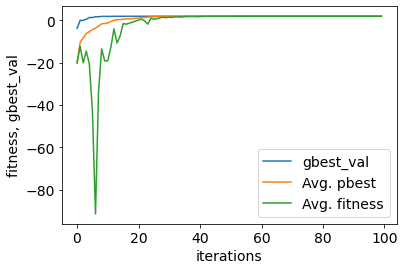

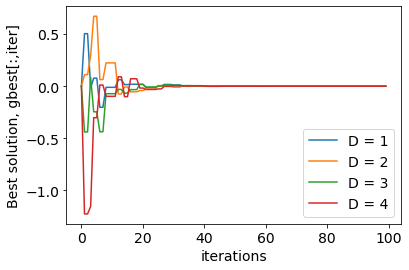

In [27]:
# @author: Mohammad Asif Zaman

from __future__ import print_function    

import time
import math
import numpy as np
import pylab as py
py.rcParams.update({'font.size': 14})


# Control parameters
w = 0.5                   # Intertial weight. In some variations, it is set to vary with iteration number.
c1 = 2.0                  # Weight of searching based on the optima found by a particle
c2 = 2.0                  # Weight of searching based on the optima found by the swarm
v_fct = 1                 # Velocity adjust factor. Set to 1 for standard PSO.


Np = 40                   # population size (number of particles)
D = 4                     # dimension (= no. of parameters in the fitness function)
max_iter = 100            # maximum number of iterations 
xL = np.zeros(D) - 4      # lower bound (does not need to be homogeneous)  
xU = np.zeros(D) + 4      # upper bound (does not need to be homogeneous)   



# Fitness function. The code maximizes the value of the fitness function
def fitness(x):
    # x is a matrix of size D x Np
    # The position of the entire swarmp is inputted at once. 
    # Thus, one function call evaluates the fitness value of the entire swarm
    # F is a vector of size Np. Each element represents the fitness value of each particle in the swarm
    
    F_sphere = 2.0 - np.sum(np.multiply(x,x),0)    # modified sphere function
    return F_sphere



pbest_val = np.zeros(Np)            # Personal best fintess value. One pbest value per particle.
gbest_val = np.zeros(max_iter)      # Global best fintess value. One gbest value per iteration (stored).


pbest = np.zeros((D,Np))            # pbest solution
gbest = np.zeros(D)                 # gbest solution

gbest_store = np.zeros((D,max_iter))   # storing gbest solution at each iteration

pbest_val_avg_store = np.zeros(max_iter)
fitness_avg_store = np.zeros(max_iter)

x = np.random.rand(D,Np)            # Initial position of the particles
v = np.zeros((D,Np))                # Initial velocity of the particles


# Setting the initial position of the particles over the given bounds [xL,xU]
for m in range(D):    
    x[m,:] = xL[m] + (xU[m]-xL[m])*x[m,:]
    

# Initial evaluations (for iteration = 0)
# Function call. Evaluates the fitness of the initial swarms    
fit = fitness(x)           # vector of size Np

pbest_val = np.copy(fit)   # initial personal best = initial fitness values. Vector of size Np
pbest = np.copy(x)         # initial pbest solution = initial position. Matrix of size D x Np

# Calculating gbest_val and gbest. Note that gbest is the best solution within pbest                                                                                                                      
ind = np.argmax(pbest_val)                # index where pbest_val is maximum. 
gbest_val[0] = np.copy(pbest_val[ind])    # set initial gbest_val
gbest = np.copy(pbest[:,ind])
pbest_val_avg_store[0] = np.mean(pbest_val)
fitness_avg_store[0] = np.mean(fit)

print("Iter. =", 0, ". gbest_val = ", gbest_val[0])
print("gbest_val = ",gbest_val[0])


# Loop over the generations
for iter in range(1,max_iter):
    
  
    r1 = np.random.rand(D,Np)           # random numbers [0,1], matrix D x Np
    r2 = np.random.rand(D,Np)           # random numbers [0,1], matrix D x Np   
    v_global = np.multiply(((x.transpose()-gbest).transpose()),r2)*c2*(-1.0)    # velocity towards global optima
    v_local = np.multiply((pbest- x),r1)*c1           # velocity towards local optima (pbest)

    v = w*v + (v_local + v_global)      # velocity update
  
    x = x + v*v_fct                     # position update
    
    
    fit = fitness(x)                    # fitness function call (once per iteration). Vector Np
    
    # pbest and pbest_val update
    ind = np.argwhere(fit > pbest_val)  # indices where current fitness value set is greater than pbset
    pbest_val[ind] = np.copy(fit[ind])  # update pbset_val at those particle indices where fit > pbest_val
    pbest[:,ind] = np.copy(x[:,ind])    # update pbest for those particle indices where fit > pbest_val
  
    
    # gbest and gbest_val update
    ind2 = np.argmax(pbest_val)                       # index where the fitness is maximum
    gbest_val[iter] = np.copy(pbest_val[ind2])        # store gbest value at each iteration
    gbest = np.copy(pbest[:,ind2])                    # global best solution, gbest
    
    gbest_store[:,iter] = np.copy(gbest)              # store gbest solution
    
    pbest_val_avg_store[iter] = np.mean(pbest_val)
    fitness_avg_store[iter] = np.mean(fit)
    print("Iter. =", iter, ". gbest_val = ", gbest_val[iter])  # print iteration no. and best solution at each iteration
    
    

# Plotting
py.close('all')
py.figure(1)
py.plot(gbest_val,label = 'gbest_val')
py.plot(pbest_val_avg_store, label = 'Avg. pbest')
py.plot(fitness_avg_store, label = 'Avg. fitness')
py.legend()


py.xlabel('iterations')
py.ylabel('fitness, gbest_val')


py.figure(2)
for m in range(D):
    py.plot(gbest_store[m,:],label = 'D = ' + str(m+1))
    
py.legend()
py.xlabel('iterations')
py.ylabel('Best solution, gbest[:,iter]')

## Tentative 3:  Multilevel Thresholding

In [28]:
import cv2
import numpy as np
import math

img = cv2.imread("000280.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

a = 0
b = 255
n = 3 # number of thresholds (better choose even value)
k = 0.7 # free variable to take any positive value
T = [] # list which will contain 'n' thresholds

def multiThresh(img, a, b):
    if a>b:
        s=-1
        m=-1
        return m,s

    img = np.array(img)
    t1 = (img>=a)
    t2 = (img<=b)
    X = np.multiply(t1,t2)
    Y = np.multiply(img,X)
    s = np.sum(X)
    m = np.sum(Y)/s
    return m,s

for i in range(int(n/2-1)):
    img = np.array(img)
    t1 = (img>=a)
    t2 = (img<=b)
    X = np.multiply(t1,t2)
    Y = np.multiply(img,X)
    mu = np.sum(Y)/np.sum(X)

    Z = Y - mu
    Z = np.multiply(Z,X)
    W = np.multiply(Z,Z)
    sigma = math.sqrt(np.sum(W)/np.sum(X))

    T1 = mu - k*sigma
    T2 = mu + k*sigma

    x, y = multiThresh(img, a, T1)
    w, z = multiThresh(img, T2, b)

    T.append(x)
    T.append(w)

    a = T1+1
    b = T2-1
    k = k*(i+1)

T1 = mu
T2 = mu+1
x, y = multiThresh(img, a, T1)
w, z = multiThresh(img, T2, b)    
T.append(x)
T.append(w)
T.sort()
print(T)

[43.08930114358323, 78.94859826303431]


## Tentative 4: Multilevel Thresholding usando Multi-Otsu
    
    
    Liao, P-S., Chen, T-S. and Chung, P-C., “A fast algorithm for multilevel thresholding”, Journal of Information Science and Engineering 17 (5): 713-727, 2001. Available at: <https://ftp.iis.sinica.edu.tw/JISE/2001/200109_01.pdf>.

The thresholds are: [49 96]


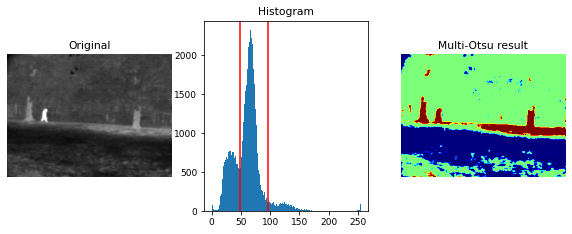

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.filters import threshold_multiotsu

# Setting the font size for all plots.
matplotlib.rcParams['font.size'] = 9

# The input image.
image = cv2.imread('000280.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

print("The thresholds are:" , thresholds)
# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()